In [1]:
import joblib

artifact = joblib.load("../models/final_model_locked.pkl")

model = artifact["model"]
scaler = artifact["scaler"]
threshold = artifact["threshold"]

print("Model Loaded Successfully")
print("Threshold:", threshold)
print("Model Type:", type(model))


Model Loaded Successfully
Threshold: 0.4
Model Type: <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [2]:
import numpy as np

X = np.load("../data/home_credit/X_clean.npy")

print("Shape of X:", X.shape)


Shape of X: (307511, 219)


In [3]:
X_sample = X[:1000]

print("Shape of X_sample:", X_sample.shape)


Shape of X_sample: (1000, 219)


In [4]:
import shap

explainer = shap.LinearExplainer(model, X_sample)
shap_values = explainer.shap_values(X_sample)

print("SHAP values shape:", np.array(shap_values).shape)


SHAP values shape: (1000, 219)


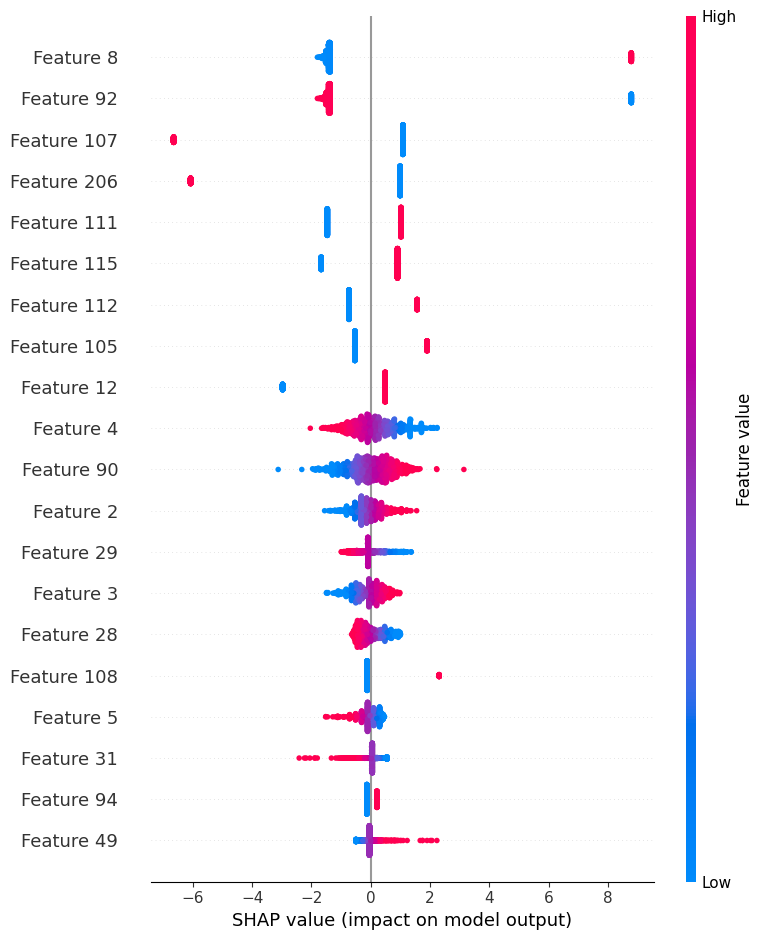

FileNotFoundError: [Errno 2] No such file or directory: '../reports/shap_outputs/global_summary.png'

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, X_sample)

plt.tight_layout()
plt.savefig("../reports/shap_outputs/global_summary.png")
plt.show()


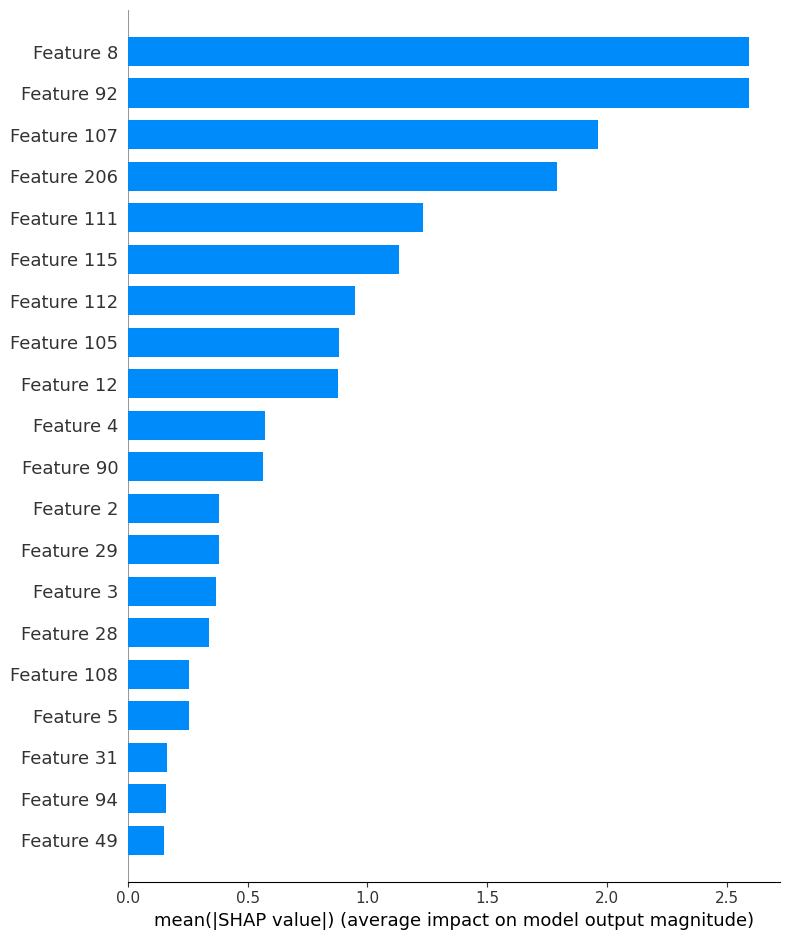

<Figure size 640x480 with 0 Axes>

In [6]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

plt.tight_layout()
plt.show()


In [7]:
sample = X_sample[0]

shap_values_single = explainer.shap_values(sample.reshape(1, -1))

print("Single SHAP shape:", np.array(shap_values_single).shape)


Single SHAP shape: (1, 219)


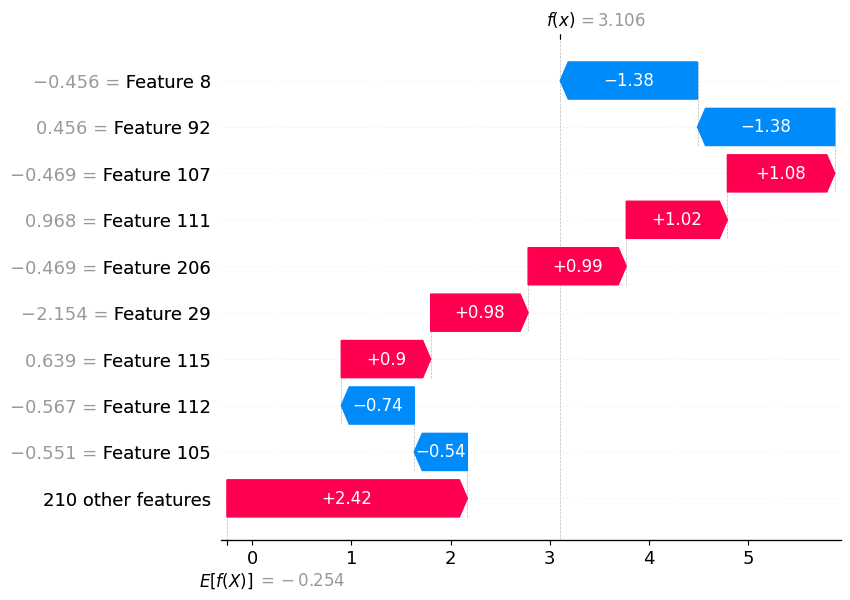

In [8]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_single[0],
        base_values=explainer.expected_value,
        data=sample
    )
)

plt.show()


In [9]:
base_value = explainer.expected_value
shap_sum = shap_values_single[0].sum()

model_output = model.decision_function(sample.reshape(1, -1))[0]

print("Base value:", base_value)
print("Sum of SHAP values:", shap_sum)
print("Base + SHAP Sum:", base_value + shap_sum)
print("Model decision output:", model_output)


Base value: -0.25437248369875404
Sum of SHAP values: 3.360122555277049
Base + SHAP Sum: 3.105750071578295
Model decision output: 3.1057500715782975


In [10]:
import os

os.makedirs("../reports/shap_outputs", exist_ok=True)


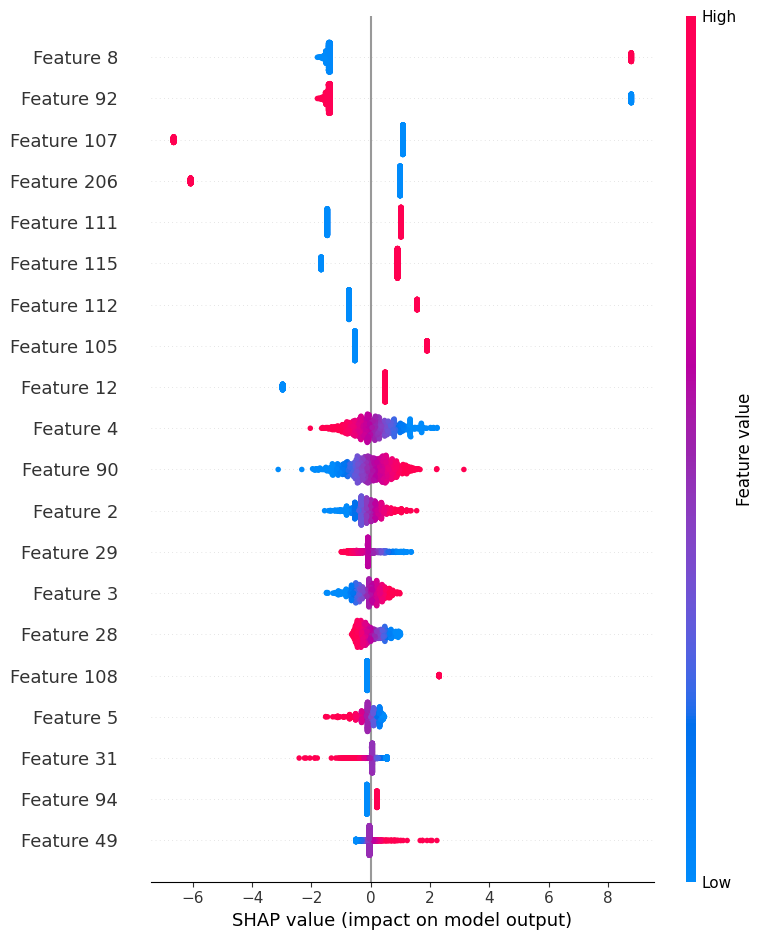

In [11]:
shap.summary_plot(shap_values, X_sample)
plt.tight_layout()
plt.savefig("../reports/shap_outputs/global_summary.png")
plt.close()


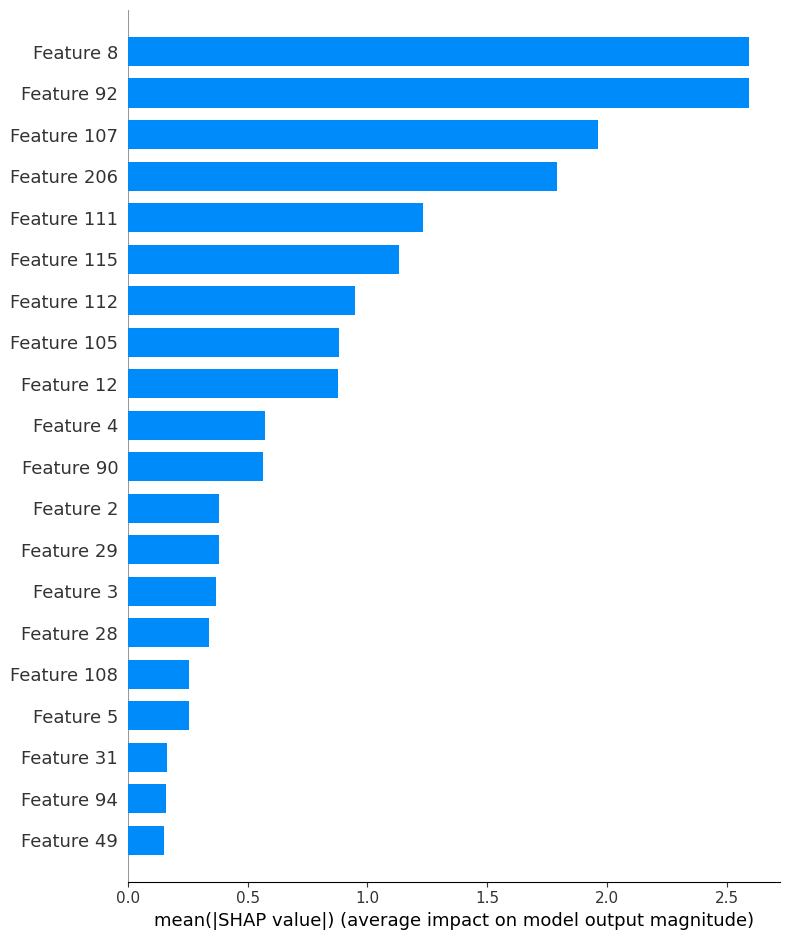

In [12]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")
plt.tight_layout()
plt.savefig("../reports/shap_outputs/global_bar.png")
plt.close()


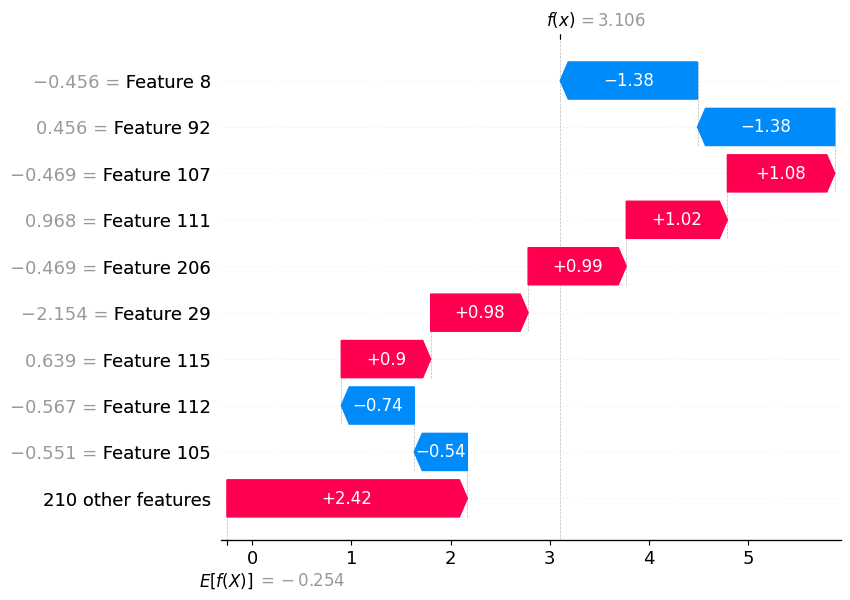

In [13]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_single[0],
        base_values=explainer.expected_value,
        data=sample
    )
)

plt.tight_layout()
plt.savefig("../reports/shap_outputs/local_waterfall.png")
plt.close()
